# Code describe the line of reasoning we need to show for all the cases

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

# Load data

In [2]:
B = pd.read_parquet('./data/B_HKML.parquet')

In [3]:
B = B[B['date'] < '2022-05-01']

In [4]:
X_df = pd.read_parquet('./data/X_HKML.parquet')

In [5]:
X_df = X_df[X_df['date'] < '2022-05-01']

In [6]:
y_df = pd.read_parquet('./data/Y_HKML.parquet')

In [7]:
y_df = y_df.iloc[X_df.index]

In [8]:
y_df.shape, X_df.shape

((310704, 1), (310704, 161))

In [9]:
# Omega

In [10]:
def omega(x_df):
    x = x_df.to_numpy()
    omega = np.dot(x, np.linalg.pinv(x))
    return pd.DataFrame(omega)

In [11]:
Omega = B.groupby('date').apply(lambda x: omega(x))

In [ ]:
del Omega

0         1         2         3         4         5     \
date                                                                          
2016-02-17 0     0.035652 -0.008186  0.002808  0.034472 -0.003447 -0.002116   
           1    -0.008186  0.073452 -0.003718  0.006383  0.003093 -0.000760   
           2     0.002808 -0.003718  0.027828 -0.002306 -0.003708  0.000979   
           3     0.034472  0.006383 -0.002306  0.131603  0.004925 -0.001694   
           4    -0.003447  0.003093 -0.003708  0.004925  0.075393  0.002022   
...                   ...       ...       ...       ...       ...       ...   
2022-04-27 1002 -0.005145  0.001136 -0.003702  0.002203  0.006458 -0.004588   
           1003 -0.001783 -0.001400  0.004313  0.006323  0.003846 -0.001863   
           1004 -0.001983  0.000496  0.001544  0.000060 -0.001133 -0.001795   
           1005 -0.000149 -0.000496  0.002503  0.003109  0.003598  0.005260   
           1006  0.002515  0.003200  0.002322 -0.016419  0.000115  0.004432   

                     6         7         8         9     ...  1046  1047  \
date                                                     ...               
2016-02-17 0    -0.002028  0.000333  0.002445  0.006977  ...   NaN   NaN   
           1     0.008767 -0.005741  0.000815 -0.003704  ...   NaN   NaN   
           2    -0.002075  0.001389 -0.000115  0.003217  ...   NaN   NaN   
           3     0.005558 -0.000655 -0.000462 -0.004296  ...   NaN   NaN   
           4     0.000058 -0.000694 -0.000023 -0.004744  ...   NaN   NaN   
...                   ...       ...       ...       ...  ...   ...   ...   
2022-04-27 1002  0.001013  0.001780 -0.006804 -0.004492  ...   NaN   NaN   
           1003  0.001859  0.000758 -0.003977 -0.001676  ...   NaN   NaN   
           1004  0.002309  0.000843 -0.003545  0.003269  ...   NaN   NaN   
           1005  0.000216 -0.000505 -0.000676  0.006861  ...   NaN   NaN   
           1006 -0.002432  0.001180  0.002632  0.005789  ...   NaN   NaN   

                 1048  1049  1050  1051  1052  1053  1054  1055  
date                                                             
2016-02-17 0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
           1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
           2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
           3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
           4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...               ...   ...   ...   ...   ...   ...   ...   ...  
2022-04-27 1002   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
           1003   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
           1004   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
           1005   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
           1006   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[310704 rows x 1056 columns]

In [12]:
Omega.reset_index(level=1, drop=True).reset_index(inplace=True)

# Gaussianize Target

In [9]:
import sys

sys.path.insert(1, "../../Feature engg/feature-engineering/src")
from class_ import Data

In [10]:
y_date = pd.concat([X_df['date'], y_df], axis=1)

In [11]:
data = Data(f_matrix=y_date, b_matrix=B)

In [12]:
data.gaussianize()

  0%|          | 0/1 [00:00<?, ?it/s]

0

In [13]:
data.standardize()

  0%|          | 0/1 [00:00<?, ?it/s]

0

In [14]:
y_date = data.f_matrix

In [15]:
y_df = y_date['target_w']

<AxesSubplot: >

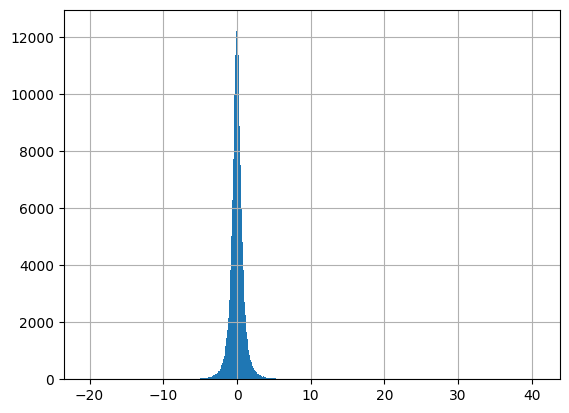

In [16]:
y_df.hist(bins=1000)

In [17]:
# Kernel Ridge Regression test

In [40]:
from sklearn.kernel_ridge import KernelRidge

In [41]:
krr = KernelRidge(alpha=1.0)

In [43]:
krr.kernel

'linear'

In [20]:
moons = X_df.date.unique()

In [21]:
300/5

60.0

In [22]:
batches = 7

In [23]:
for i in range(batches):
    X = X_df[X_df['date'].isin(moons[(i*5):5*(i+1)])].drop('date', axis=1)
    y = y_df.iloc[X.index]
    krr.fit(X, y)
    print('In Sample')
    print(np.corrcoef(krr.predict(X), y))
    #for j in range(10):
    #    X = X_df[X_df['date'] == moons[(i+1)*35+1+j]].drop('date', axis=1)
    #    y = y_df.iloc[X.index]
    #    y_hat = krr.predict(X)
    #    print('Out of Sample')
    #    print(np.corrcoef(y_hat, y))

In Sample
[[1.         0.21816376]
 [0.21816376 1.        ]]
In Sample
[[1.         0.23717042]
 [0.23717042 1.        ]]
In Sample
[[1.         0.21617125]
 [0.21617125 1.        ]]
In Sample
[[1.         0.24401615]
 [0.24401615 1.        ]]
In Sample
[[1.         0.21146556]
 [0.21146556 1.        ]]
In Sample
[[1.         0.20871327]
 [0.20871327 1.        ]]
In Sample
[[1.         0.19900934]
 [0.19900934 1.        ]]


In [28]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel
from sklearn.kernel_ridge import KernelRidge

kernel = 1.0 * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) * RBF(
    length_scale=15, length_scale_bounds="fixed"
) + WhiteKernel(1e-1)
gaussian_process = GaussianProcessRegressor()

In [29]:
for i in range(batches):
    X = X_df[X_df['date'] == moons[i]].drop('date', axis=1)
    y = y_df.iloc[X.index]
    gaussian_process.fit(X, y)
    print('In Sample')
    print(np.corrcoef(gaussian_process.predict(X), y))
    #for j in range(10):
    #    X = X_df[X_df['date'] == moons[(i+1)*35+1+j]].drop('date', axis=1)
    #    y = y_df.iloc[X.index]
    #    y_hat = krr.predict(X)
    #    print('Out of Sample')
    #    print(np.corrcoef(y_hat, y))

/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)


In Sample


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1545: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)


[[1. 1.]
 [1. 1.]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)


In Sample


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1545: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)


[[1.         0.99989365]
 [0.99989365 1.        ]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)


In Sample


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1545: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)


[[1.         0.99995638]
 [0.99995638 1.        ]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)


In Sample


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1545: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)


[[1.         0.99995075]
 [0.99995075 1.        ]]
In Sample
[[1.         0.99996443]
 [0.99996443 1.        ]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)


In Sample


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1545: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:406: RuntimeWarning: underflow encountered in matmul
  y_mean = K_trans @ self.alpha_


[[1.         0.99997915]
 [0.99997915 1.        ]]
In Sample
[[1.         0.99997215]
 [0.99997215 1.        ]]


In [31]:
gaussian_process.kernel_

1**2 * RBF(length_scale=1)

In [32]:
gaussian_process = GaussianProcessRegressor(kernel = 1**2 * RBF(length_scale=1))
for i in range(batches):
    X = X_df[X_df['date'].isin(moons[(i*5):5*(i+1)])].drop('date', axis=1)
    y = y_df.iloc[X.index]
    gaussian_process.fit(X, y)
    print('In Sample')
    print(np.corrcoef(gaussian_process.predict(X), y))
    #for j in range(10):
    #    X = X_df[X_df['date'] == moons[(i+1)*35+1+j]].drop('date', axis=1)
    #    y = y_df.iloc[X.index]
    #    y_hat = krr.predict(X)
    #    print('Out of Sample')
    #    print(np.corrcoef(y_hat, y))

/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1552: RuntimeWarning: underflow encountered in multiply
  K_gradient = (K * squareform(dists))[:, :, np.newaxis]
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning:

In Sample


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1545: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning: underflow encountered in multiply
  return self.k1(X, Y) * self.k2(X, Y)


[[1. 1.]
 [1. 1.]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1552: RuntimeWarning: underflow encountered in multiply
  K_gradient = (K * squareform(dists))[:, :, np.newaxis]
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarn

In Sample


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning: underflow encountered in multiply
  return self.k1(X, Y) * self.k2(X, Y)


[[1.         0.99989114]
 [0.99989114 1.        ]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1552: RuntimeWarning: underflow encountered in multiply
  K_gradient = (K * squareform(dists))[:, :, np.newaxis]
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarn

In Sample


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1545: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning: underflow encountered in multiply
  return self.k1(X, Y) * self.k2(X, Y)


[[1.         0.99994468]
 [0.99994468 1.        ]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1552: RuntimeWarning: underflow encountered in multiply
  K_gradient = (K * squareform(dists))[:, :, np.newaxis]
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarn

In Sample


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1545: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning: underflow encountered in multiply
  return self.k1(X, Y) * self.k2(X, Y)


[[1.         0.99995074]
 [0.99995074 1.        ]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1552: RuntimeWarning: underflow encountered in multiply
  K_gradient = (K * squareform(dists))[:, :, np.newaxis]
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.


In Sample
[[1.         0.99996323]
 [0.99996323 1.        ]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1552: RuntimeWarning: underflow encountered in multiply
  K_gradient = (K * squareform(dists))[:, :, np.newaxis]
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning:

In Sample


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1545: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning: underflow encountered in multiply
  return self.k1(X, Y) * self.k2(X, Y)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:406: RuntimeWarning: underflow encountered in matmul
  y_mean = K_trans @ self.alpha_


[[1.         0.99997915]
 [0.99997915 1.        ]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1552: RuntimeWarning: underflow encountered in multiply
  K_gradient = (K * squareform(dists))[:, :, np.newaxis]
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning: underflow encountered in multiply
  return self.k1(X, Y) * self.k2(X, Y)


In Sample


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning: underflow encountered in multiply
  return self.k1(X, Y) * self.k2(X, Y)


[[1.         0.99997215]
 [0.99997215 1.        ]]


In [33]:
for i in range(batches):
    X = X_df[X_df['date'] == moons[i]].drop('date', axis=1)
    y = y_df.iloc[X.index]
    gaussian_process.fit(X, y)
    print('In Sample')
    print(np.corrcoef(gaussian_process.predict(X), y))
    #for j in range(10):
    #    X = X_df[X_df['date'] == moons[(i+1)*35+1+j]].drop('date', axis=1)
    #    y = y_df.iloc[X.index]
    #    y_hat = krr.predict(X)
    #    print('Out of Sample')
    #    print(np.corrcoef(y_hat, y))

/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning: underflow encountered in multiply
  return self.k1(X, Y) * self.k2(X, Y)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning: underflow encountered in multiply
  return self.k1(X, Y) * self.k2(X, Y)


In Sample
[[1. 1.]
 [1. 1.]]
In Sample
[[1. 1.]
 [1. 1.]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1552: RuntimeWarning: underflow encountered in multiply
  K_gradient = (K * squareform(dists))[:, :, np.newaxis]
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning:

In Sample
[[1. 1.]
 [1. 1.]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1537: RuntimeWarning: underflow encountered in exp
  K = np.exp(-0.5 * dists)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:1552: RuntimeWarning: underflow encountered in multiply
  K_gradient = (K * squareform(dists))[:, :, np.newaxis]
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning:

In Sample
[[1. 1.]
 [1. 1.]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning: underflow encountered in multiply
  return self.k1(X, Y) * self.k2(X, Y)
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:946: RuntimeWarning: underflow encountered in multiply
  return self.k1(X, Y) * self.k2(X, Y)


In Sample
[[1. 1.]
 [1. 1.]]


/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:942: RuntimeWarning: underflow encountered in multiply
  return K1 * K2, np.dstack(
/Users/utkarshpratiush/Cr_D/Feature engg/c_dao_env/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:943: RuntimeWarning: underflow encountered in multiply
  (K1_gradient * K2[:, :, np.newaxis], K2_gradient * K1[:, :, np.newaxis])


In Sample
[[1. 1.]
 [1. 1.]]
In Sample
[[1. 1.]
 [1. 1.]]


In [39]:
gaussian_process.predict(X)

array([-5.28917054e-01,  5.05016626e-01, -4.11538505e-01, -2.03392853e+00,
        3.40026229e-01, -1.04849344e-01, -2.58273724e-02,  1.01271709e-02,
        1.16311412e+00,  7.26245504e-01, -3.19008282e-01, -5.18540012e-01,
        5.46243665e-01,  6.95814849e-01, -1.86177338e+00, -5.57710391e-01,
        1.27931129e+00,  3.44903298e-01, -6.38501956e-02,  1.95227646e+00,
        3.63336957e-01,  6.81933350e-01,  6.45931687e-01, -3.37025724e-01,
       -1.20608680e-01,  9.28011623e-02, -3.30665357e-01,  1.90531665e-01,
       -1.66490613e-01,  1.34104295e-01,  5.57510855e-01,  1.49303550e+00,
        5.02525933e-01,  2.26567588e-01,  1.28922270e-01,  4.21824548e-01,
       -6.41615335e-01, -1.61326098e-01,  4.26867570e-01, -9.42800342e-02,
        9.44209999e-01,  1.03859327e-02, -1.38797185e+00, -5.17566943e-01,
       -5.40669908e-01, -2.13015599e-01,  1.51669092e-01, -5.93061259e-01,
       -1.33859253e-01,  6.17898640e-02, -1.23492111e+00,  1.56865032e-01,
        2.40587820e-02,  

In [38]:
y

5933   -0.528917
5934    0.505017
5935   -0.411539
5936   -2.033929
5937    0.340026
          ...   
6904   -0.652057
6905   -3.238789
6906   -0.551097
6907    0.212704
6908   -0.617384
Name: target_w, Length: 976, dtype: float64

# targets not orthogonal

# Train-test split

In [26]:
moons = X_df.date.unique()

In [1269]:
moon_train = moons[:230] 
moon_test = moons[260:]

# Define loss function

In [1247]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
from tqdm import tqdm

In [1248]:
error_lis_mse = []
error_lis_orth = []
error_lis_combined = []
loss_mse = nn.MSELoss()

In [1249]:
def custom_loss2(y_pred, y_true, b_moon):
    Omega = torch.eye(len(y_true)) - torch.mm(b_moon, torch.pinverse(b_moon))
    z_hat = torch.mm(Omega, y_pred)
    
    error = torch.linalg.norm(z_hat - y_true)/len(y_true)    
    return error

In [1250]:
def custom_loss3(y_pred, y_true, omega_moon):
    error1 = loss_mse(y_pred, y_true) /len(y_true)    
    error2 = loss_mse(torch.zeros(b_moon.shape[1], 1), torch.mm(omega_moon, y_pred))/len(y_true)/torch.linalg.norm(y_pred)
    error = error1 + error2 
    error_lis_mse.append(error1.item())
    error_lis_orth.append(error2.item())
    error_lis_combined.append(error.item())    
    return error

# Train model and predict

In [1251]:
# As this notebook shows a simple linear model, there is no need to introduce validation data, i.e. 
# the training is deterministic and only one epoch is necessary to perform it.
# Nevertheless, this section should train such that the validation loss is minimized.

In [1254]:
class RegressionModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RegressionModel, self).__init__()
        self.layers = torch.nn.Sequential(
            # torch.nn.Linear(input_size, hidden_size),
            # torch.nn.Dropout(p=0.3),
            # torch.nn.ReLU(),
            torch.nn.Linear(input_size, output_size)
        )

    def forward(self, x):
        return self.layers(x)

In [1255]:
# Create an instance of the model
model = RegressionModel(input_size=160, hidden_size=2, output_size=1)

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters())

# train model for x epochs using custom loss function
num_epochs = 10

In [1256]:
for i in tqdm(range(num_epochs)):
    print(f"Epoch {i+1}")
    # create minibatch of data
    for moon in moons[:230]:
        X_moon = torch.from_numpy(X_df[X_df.date == moon].drop(columns=["date"]).values).to(torch.float32)
        y_moon = torch.from_numpy(y_df[X_df.date == moon].values.reshape(-1,1)).to(torch.float32)
        omega_moon = torch.from_numpy(B[X_df.date == moon].drop(columns=["date"]).values.T).to(torch.float32)
        y_pred = model(X_moon)
        loss = custom_loss3(y_pred, y_moon, omega_moon)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Print the loss every epoch
    if (i + 1) % 1 == 0:
        print('Epoch [{}/{}], Loss: {:.10f}'.format(i+1, num_epochs, loss.item()))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1


 10%|█         | 1/10 [00:00<00:08,  1.01it/s]

Epoch [1/10], Loss: 0.0019578745
Epoch 2


 20%|██        | 2/10 [00:02<00:08,  1.05s/it]

Epoch [2/10], Loss: 0.0019582552
Epoch 3


 30%|███       | 3/10 [00:03<00:07,  1.05s/it]

Epoch [3/10], Loss: 0.0019583516
Epoch 4


 40%|████      | 4/10 [00:04<00:06,  1.04s/it]

Epoch [4/10], Loss: 0.0019583998
Epoch 5


 50%|█████     | 5/10 [00:05<00:05,  1.04s/it]

Epoch [5/10], Loss: 0.0019584310
Epoch 6


 60%|██████    | 6/10 [00:06<00:04,  1.04s/it]

Epoch [6/10], Loss: 0.0019584531
Epoch 7


 70%|███████   | 7/10 [00:07<00:03,  1.03s/it]

Epoch [7/10], Loss: 0.0019584671
Epoch 8


 80%|████████  | 8/10 [00:08<00:02,  1.03s/it]

Epoch [8/10], Loss: 0.0019584906
Epoch 9


 90%|█████████ | 9/10 [00:09<00:01,  1.03s/it]

Epoch [9/10], Loss: 0.0019585034
Epoch 10


100%|██████████| 10/10 [00:10<00:00,  1.03s/it]

Epoch [10/10], Loss: 0.0019585034


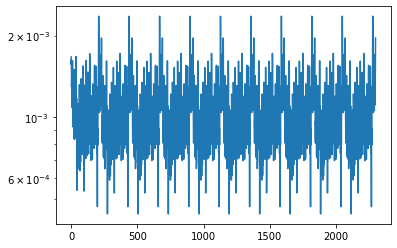

In [1257]:
plt.semilogy(error_lis_mse)

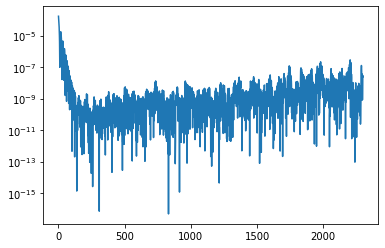

In [1258]:
plt.semilogy(error_lis_orth)

In [1259]:
epoch_loss = []
epoch_loss_mse = []
epoch_loss_orth = []
for i in range(num_epochs - 1):
    epoch_loss.append(sum(error_lis_combined[230*i:230*(i+1)]))
    epoch_loss_mse.append(sum(error_lis_mse[230*i:230*(i+1)]))
    epoch_loss_orth.append(sum(error_lis_mse[230*i:230*(i+1)]))

In [1260]:
epoch_loss[0], epoch_loss_mse[0], epoch_loss_orth[0]

(0.24426404730184004, 0.2434732907859143, 0.2434732907859143)

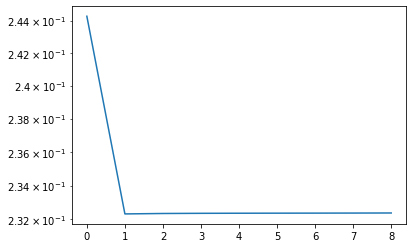

In [1261]:
plt.semilogy(epoch_loss)

In [1262]:
y_hat =  model(torch.from_numpy(X_df[X_df.date > moons[260]].drop(columns=["date"]).values).to(torch.float32)).detach().numpy()

In [1263]:
y_test = y_df[X_df.date > moons[260]].values.reshape(-1,1)

In [1264]:
y_hat = y_hat.ravel()
y_test = y_test.ravel()

In [1265]:
y_hat.shape, y_test.shape

((46376,), (46376,))

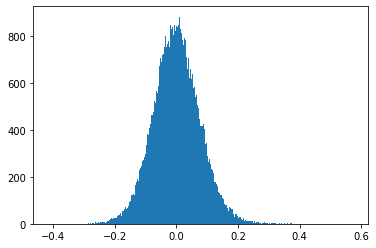

In [1266]:
plt.hist(y_hat, bins=300)
plt.show()

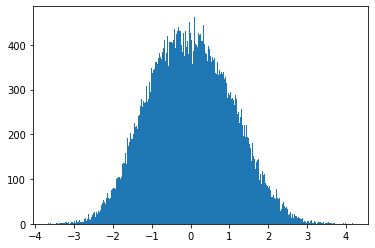

In [1267]:
plt.hist(y_test, bins=300)
plt.show()

# Scatter plot to show linear relation between Y and y_hat

In [1082]:
from scipy.stats import linregress

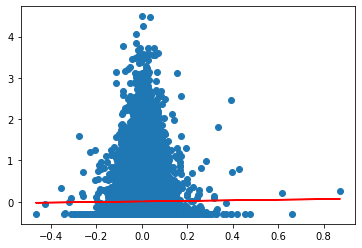

In [1083]:
slope, intercept, r_value, p_value, std_err = linregress(y_test, y_hat)
plt.scatter(y_test, y_hat)
plt.plot(y_test, slope * y_test + intercept,'r')
plt.show()

In [1084]:
y_hat_df = pd.DataFrame()
y_hat_df['date'] = X_df[X_df['date'] > moons[260]].date
y_hat_df['y_hat'] = y_hat
y_hat_df['Y'] = y_test

In [1085]:
y_hat_df # custom_fitenss

,date,y_hat,Y
264328,2021-06-16,2.589103,-0.010859
264329,2021-06-16,0.204929,-0.036569
264330,2021-06-16,1.296528,-0.005702
264331,2021-06-16,-0.121545,-0.017353
264332,2021-06-16,0.953924,-0.021563
...,...,...,...
310699,2022-04-27,0.730897,0.020271
310700,2022-04-27,1.092606,-0.023498
310701,2022-04-27,2.235324,0.007559
310702,2022-04-27,0.064444,-0.006418


In [1086]:
y_hat_df # mse_fitness

,date,y_hat,Y
264328,2021-06-16,2.589103,-0.010859
264329,2021-06-16,0.204929,-0.036569
264330,2021-06-16,1.296528,-0.005702
264331,2021-06-16,-0.121545,-0.017353
264332,2021-06-16,0.953924,-0.021563
...,...,...,...
310699,2022-04-27,0.730897,0.020271
310700,2022-04-27,1.092606,-0.023498
310701,2022-04-27,2.235324,0.007559
310702,2022-04-27,0.064444,-0.006418


# Spearman

In [1074]:
def spear(x):
    return x.corr(method='spearman').iloc[0, 1]

In [1075]:
spearman = y_hat_df.groupby("date").apply(lambda x: spear(x))

/tmp/ipykernel_15475/710519440.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return x.corr(method='spearman').iloc[0, 1]


In [1076]:
spearman.mean(), spearman.shape # 46 values for 46 moons

(-0.0007639404460393972, (46,))

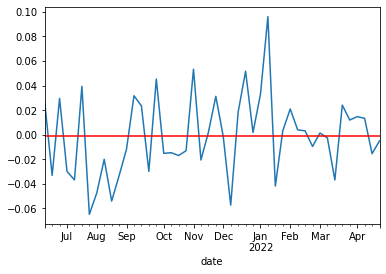

In [1077]:
spearman.plot()
plt.axhline(y=spearman.mean(), color='r', linestyle='-')
plt.show()

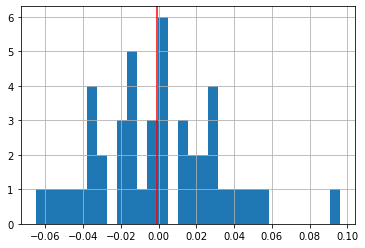

In [1078]:
spearman.hist(bins=30)
plt.axvline(x=spearman.mean(), color='r', linestyle='-')

# MSE

In [1079]:
mse = y_hat_df.groupby('date').apply(lambda x: mean_squared_error(x.y_hat, x.Y))

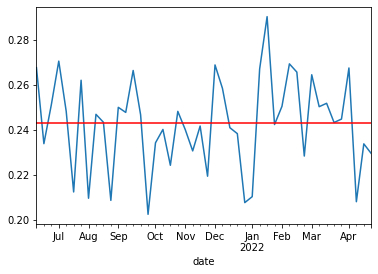

In [1080]:
mse.plot()
plt.axhline(y=mse.mean(), color='r', linestyle='-')
plt.show()

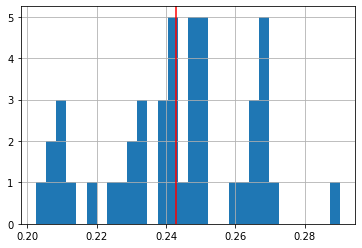

In [1081]:
mse.hist(bins=30)
plt.axvline(x=mse.mean(), color='r', linestyle='-')

# Orthogonalize output and show same results.

In [890]:
B = B[X_df.date > moons[260]]

In [891]:
B

,date,USFASTD_1DREVRSL,USFASTD_AERODEF,USFASTD_AIRLINES,USFASTD_ALUMSTEL,USFASTD_APPAREL,USFASTD_AUTO,USFASTD_BANKS,USFASTD_BETA,USFASTD_BEVTOB,...,USFASTD_SOFTWARE,USFASTD_SPLTYRET,USFASTD_SPTYCHEM,USFASTD_SPTYSTOR,USFASTD_STREVRSL,USFASTD_TELECOM,USFASTD_TRADECO,USFASTD_TRANSPRT,USFASTD_VALUE,USFASTD_WIRELESS
264328,2021-06-16,0.596,0.852,0.0,0.0,0.0,0.0,0.000,1.101,0.0,...,0.0,0.0,0.000,0.0,0.372,0.0,0.000,0.148,-1.258,0.0
264329,2021-06-16,-0.934,0.000,0.0,0.0,0.0,0.0,0.000,-0.048,0.0,...,0.0,0.0,0.000,0.0,-1.351,0.0,0.000,0.000,2.165,0.0
264330,2021-06-16,-0.119,0.000,0.0,0.0,0.0,0.0,0.000,-0.378,0.0,...,0.0,0.0,0.448,0.0,0.285,0.0,0.096,0.000,0.607,0.0
264331,2021-06-16,-0.519,0.000,0.0,0.0,0.0,0.0,0.000,0.662,0.0,...,0.0,0.0,0.000,0.0,-0.508,0.0,0.000,0.000,-0.261,0.0
264332,2021-06-16,0.504,0.000,0.0,0.0,0.0,0.0,0.012,1.319,0.0,...,0.0,0.0,0.000,0.0,-0.176,0.0,0.000,0.000,1.321,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310699,2022-04-27,-1.975,0.000,0.0,0.0,0.0,0.0,0.000,0.064,0.0,...,0.0,0.0,0.000,0.0,0.211,0.0,0.000,0.000,1.448,0.0
310700,2022-04-27,-0.140,0.000,0.0,0.0,0.0,0.0,0.000,-1.518,0.0,...,0.0,0.0,0.028,0.0,0.239,0.0,0.000,0.000,-0.317,0.0
310701,2022-04-27,0.690,0.000,0.0,0.0,0.0,0.0,0.000,-1.714,0.0,...,0.0,0.0,0.000,0.0,0.130,0.0,0.000,0.000,0.800,0.0
310702,2022-04-27,0.246,0.000,0.0,0.0,0.0,0.0,0.000,-0.953,0.0,...,0.0,0.0,0.000,0.0,-0.777,0.0,0.000,0.000,-0.006,0.0


In [892]:
y_hat_date = y_hat_df[['date', 'y_hat']] 

In [893]:
import sys
sys.path.insert(1, "../feature-engineering/src")
from class_ import Data

In [894]:
data = Data(f_matrix=y_hat_date, b_matrix=B)

In [895]:
data.orthogonalize()

  0%|          | 0/46 [00:00<?, ?it/s]

0

In [896]:
data.f_matrix

,date,y_hat
264328,2021-06-16,0.060786
264329,2021-06-16,0.106601
264330,2021-06-16,-0.263537
264331,2021-06-16,-0.057930
264332,2021-06-16,-0.064312
...,...,...
310699,2022-04-27,0.049917
310700,2022-04-27,0.178853
310701,2022-04-27,0.036012
310702,2022-04-27,-0.013157


In [897]:
y_hat_df.y_hat = data.f_matrix.y_hat

In [898]:
y_hat_df

,date,y_hat,Y
264328,2021-06-16,0.060786,-0.010859
264329,2021-06-16,0.106601,-0.036569
264330,2021-06-16,-0.263537,-0.005702
264331,2021-06-16,-0.057930,-0.017353
264332,2021-06-16,-0.064312,-0.021563
...,...,...,...
310699,2022-04-27,0.049917,0.020271
310700,2022-04-27,0.178853,-0.023498
310701,2022-04-27,0.036012,0.007559
310702,2022-04-27,-0.013157,-0.006418


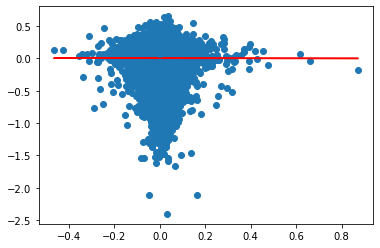

In [899]:
slope, intercept, r_value, p_value, std_err = linregress(y_hat_df.Y,y_hat_df.y_hat)
plt.scatter(y_hat_df.Y, y_hat_df.y_hat)
plt.plot(y_hat_df.Y, slope * y_hat_df.Y + intercept,'r')
plt.show()

/tmp/ipykernel_15475/710519440.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return x.corr(method='spearman').iloc[0, 1]


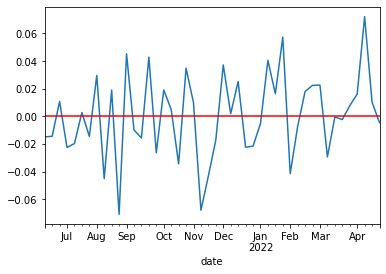

In [900]:
spearman = y_hat_df.groupby("date").apply(lambda x: spear(x))
spearman.plot()
plt.axhline(y=spearman.mean(), color='r', linestyle='-')
plt.show()

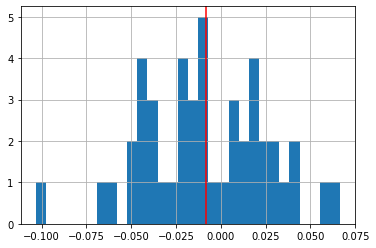

In [839]:
spearman.hist(bins=30)
plt.axvline(x=spearman.mean(), color='r', linestyle='-')

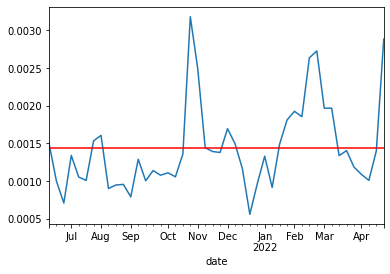

In [840]:
mse = y_hat_df.groupby('date').apply(lambda x: mean_squared_error(x.y_hat, x.Y))
mse.plot()
plt.axhline(y=mse.mean(), color='r', linestyle='-')
plt.show()

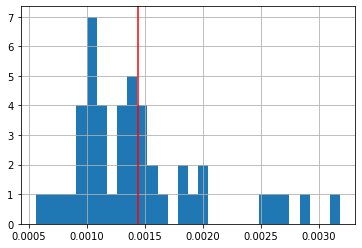

In [841]:
mse.hist(bins=30)
plt.axvline(x=mse.mean(), color='r', linestyle='-')